In [1]:
from langchain_openai import ChatOpenAI

from dotenv import load_dotenv
import os
load_dotenv()

if os.environ['OPENAI_API_KEY']:
    print("OpenAI API Key is set.")
else:
    raise ValueError("OpenAI API Key is not set.")

OpenAI API Key is set.


In [2]:
llm = ChatOpenAI(model="gpt-5-nano")
llm.invoke("I want to know the meaning of water").content


'“Water” can mean a few related things. Here’s a concise overview:\n\n- Scientific meaning\n  - Chemical substance with formula H2O: two hydrogen atoms bonded to one oxygen atom.\n  - Pure water is usually colorless, tasteless, and odorless. In nature it often has minerals that affect taste.\n  - It’s a liquid at room temperature and standard pressure, but it also exists as ice (solid) and water vapor (gas).\n  - It’s a polar molecule with strong hydrogen bonding, giving it unique properties like high surface tension, high heat capacity, and the ability to dissolve many substances (the “universal solvent”).\n\n- Everyday meaning\n  - The liquid people drink and use for cooking, cleaning, agriculture, industry, etc.\n\n- Important natural role\n  - Essential for all known life.\n  - Part of the water cycle: evaporation, condensation, precipitation, runoff, and infiltration.\n  - Earth’s surface is about 71% water, with most of that in the oceans. Freshwater is a much smaller, precious s

### **Pydantic Schema**

In [6]:
from pydantic import BaseModel, Field 

class graph_schema(BaseModel):

    topic: str = Field(description="The topic of the graph")
    post: str = Field(description="The LinkedIn post content")
    curated_post: str = Field(description="The curated LinkedIn post content")


demo_obj = graph_schema(
    topic="The importance of data privacy in the digital age",
    post="Data privacy is crucial in today's digital world. With the increasing amount of personal information being shared online, it's important to understand how to protect your data and maintain your privacy.",
    curated_post="In the digital age, data privacy is more important than ever. With the"
)
print(demo_obj)

topic='The importance of data privacy in the digital age' post="Data privacy is crucial in today's digital world. With the increasing amount of personal information being shared online, it's important to understand how to protect your data and maintain your privacy." curated_post='In the digital age, data privacy is more important than ever. With the'


In [8]:
def create_post(state: graph_schema) -> graph_schema:
    
    # Convert the Pydantic model to a dictionary
    state = state.model_dump()

    # Extract the topic from the state
    topic = state['topic']

    # Passing the topic to the LLM to generate a LinkedIn post
    post = llm.invoke(f"Write a LinkedIn post about {topic}").content

    # Update the state with the generated post
    state['post'] = post

    return state


def curate_post(state: graph_schema) -> graph_schema:

    # Convert the Pydantic model to a dictionary
    state = state.model_dump()

    # Extract the post from the state
    post = state['post']

    # Passing the post to the LLM to curate it
    curated_post = llm.invoke(f"Curate the following LinkedIn post with GenZ tone: {post}").content


    # Update the state with the curated post
    state['curated_post'] = curated_post

    return state

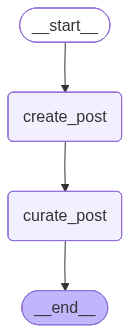

In [9]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(graph_schema)

graph.add_node("create_post", create_post)
graph.add_node("curate_post", curate_post)

graph.add_edge(START, "create_post")
graph.add_edge("create_post", "curate_post")
graph.add_edge("curate_post", END)

pydantic_graph = graph.compile()



from IPython.display import Image, display

# You could see the errors with the below command
Image(pydantic_graph.get_graph().draw_mermaid_png())

In [13]:
pydantic_graph.invoke(
    {"topic": "The importance of data privacy in the digital age",
     "post": "",
     "curated_post": ""}
)

{'topic': 'The importance of data privacy in the digital age',
 'post': "In the digital age, data privacy isn’t a feature—it’s the foundation of trust. Every click, like, and search leaves a footprint. How we collect, store, and use that data shapes experiences, safety, and credibility.\n\nWhy it matters\n- It’s a basic right and a business asset: protecting privacy protects people and protects brands.\n- Trust drives engagement: when people feel their data is handled responsibly, they participate more openly.\n- Breaches carry real costs: financial penalties, regulatory scrutiny, and long-term damage to reputation.\n- It fuels thoughtful innovation: privacy-by-design can unlock safer, smarter products and services.\n\nWhat this means in practice\n- For individuals:\n  - Review app permissions and limit data sharing to what’s necessary.\n  - Enable multi-factor authentication and use strong, unique passwords.\n  - Favor privacy-respecting services and read privacy notices.\n  - Minimiz